## Exploratory Analysis



In [9]:
import pandas as pd


df = pd.read_table("../data/tass2020/train/es.tsv", names=["id", "text", "polarity"], index_col=0)

df

,text,polarity
id,,
768512386269638656,@morbosaborealis jajajaja... eso es verdad... ...,N
768529956162924544,@Adriansoler espero y deseo que el interior te...,NEU
768557093955698688,"comprendo que te molen mis tattoos, pero no te...",NEU
770616744192929792,"Mi última partida jugada, con Sona support. La...",P
769959690092642304,Tranquilos que con el.dinero de Camacho seguro...,P
...,...,...
772522938327334912,"Penoso lo de hoy, pensando en que hacer en el ...",NEU
771303869896728577,q los GP de La Caixa (y otros) manipulen el Ib...,N
772183891029463042,Os creéis que es broma que mi foto soy yo desn...,N


Veamos primero las longitudes (a ver si no hay nada mal cargado)

(array([ 65.,  66.,  70.,  98., 112., 119.,  95., 140., 140., 221.]),
 array([ 19.,  31.,  43.,  55.,  67.,  79.,  91., 103., 115., 127., 139.]),
 <BarContainer object of 10 artists>)

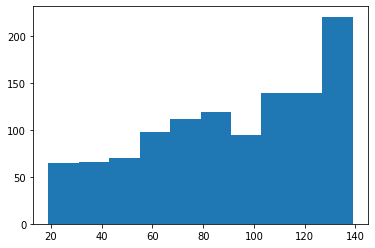

In [11]:
import matplotlib.pyplot as plt

plt.hist([len(t.text) for _, t in df.iterrows()])

In [21]:
df["polarity"].value_counts()

N      475
P      354
NEU    297
Name: polarity, dtype: int64

## Ejemplos

In [27]:
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 100

df[df["polarity"] == "NEU"]

,text,polarity
id,,
768529956162924544,@Adriansoler espero y deseo que el interior te cause lo mismo,NEU
768557093955698688,"comprendo que te molen mis tattoos, pero no te los hagas 'iguales'",NEU
770787189319925760,A mí nunca me podrán hacer una broma porque no cojo llamadas y menos cuando son ocultas,NEU
768588061496209408,"@BrujadelTuiters . Estas palabras, del Poema, INSTANTES, son de Nadine Stair. Escritora norteamericana, a la q le gustan los helados.",NEU
768506208051494912,@Iluminaughty_ @Spiegel_Spike_ pues me da igual yo escribo lo que pienso ^^ y cuando lo pienso ajajaj si es que lo pienso,NEU
...,...,...
771028065644322816,@RadicaIizate @pvaya pero... Ella... No es verde!!!! Aunque ahora que lo dices... Es muy... Eh...,NEU
770027848426000386,@Zexioning Al revés Si quiero hacer cosas me quedo en cada a ver la peli ejem.,NEU
771421546502057984,"@SeleneVirus Un poquito. Pero es normal porque es oscuro. Anyways, sigue viéndosete un poquito pelirrojo. Reflejos o algo así.",NEU


In [28]:
pd.options.display.max_colwidth = 200

df[df["polarity"] == "P"]

,text,polarity
id,,
770616744192929792,"Mi última partida jugada, con Sona support. La grandes razones para jugar Sona https://t.co/2rgmMeAFIs",P
769959690092642304,Tranquilos que con el.dinero de Camacho seguro mañana empiezan las escabadoras en el Arraijanal,P
770590136828559360,"@daniacal aún no, pero si estará jugable en el TGS no creo que tarde demasiado.",P
771339035445002240,#feliz septiembre..es bonito retarse..es increible lo mucho que puedes aprender.. medirse con el obstáculo..eres la joyita de la corona,P
768577963885522944,Este año el Madrid hará triplete y si lo hace me rapo al cero grabad el mensaje jejej #ChiringuitoPiqué,P
...,...,...
769988517975957505,"Buen amigo eres @Skyruss96, gracias por compartir tu pregunta en ese Ask 2.0",P
770333889487339520,Tengo ganas de hacer un stream muy especial.. Un 24horas pero con un objetivo...,P
770718927018135552,@manue1112 Quedan ocho meses y aún está todo por hacer. Confiemos en poder realizar el Proyecto que tenemos planteado. Paciencia,P


In [29]:
pd.options.display.max_colwidth = 200

df[df["polarity"] == "N"]

,text,polarity
id,,
768512386269638656,@morbosaborealis jajajaja... eso es verdad... aquí no hay uno cuerdo,N
770434744748236800,@ragnomuelle Yo a veces hecho de menos mi pelo largo por eso mismo entre otras cosas,N
768596566378774528,Es conveniente tener un Gobierno democrático que cumpla su función politica. NO lo es tener un Gobierno que representa la #corrupciónPP,N
768071942096166912,"@Jordicanal64 Pues si no fichan ""lo que sea"" además de un ridículo espantoso igual QSF nos deja plantados...esperemos que no",N
772121014436302848,glowen sigue a cuentas inactivas y es en plan oh seguro que esas cuentas te dan mucho más apoyo que a las que le diste unf JAJAJA,N
...,...,...
770952598954373120,@rubenlinoman como todo! Es un jugón! No quiero que lo fichéis. Es el peor día de mi vida,N
770642621966520320,".@DavidCpsberga @goslum Vamos, que usted es el portavoz de 2 millones de personas. Una inmensa... minoría. ¿Le molesta la ""minorización""?",N
771303869896728577,q los GP de La Caixa (y otros) manipulen el Ibex es una bendició gracias a ellos podemos arrañar alg son auténticos PARDILLOS,N
